# Ames Housing Price Regression

_Mrinal Chawla, Thomas Gao, Fengyao Luo_

_W207 Spring 2021_

## Road Map
1. Problem description
2. Data loading and preprocessing
3. Exploratory data analysis
4. Baseline models
5. Error analysis
6. Feature engineering
7. Modeling
8. Submission and results

## Problem Description

This project is based on the [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) compiled by Dean De Cock. It is a modernized and expanded version of the often cited Boston Housing dataset. 

The inference problem is: given features of a house, can the observed sale price be predicted?

This dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, and the challenge is to predict the final price of each home. 

Performance is measured using Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 

A model like this can be used for both sellers and buyers on a real estate market. A seller would want to know how to appropriately price their home, and a buyer would like to ensure they are not overpaying. Furthermore, a model like this may also provide some insight into the benefits of renovation. When a homeowner is considering expanding a house or adding an amenity, they can know the potential financial impact. 

### Data Description

The dataset from Kaggle is made up of a training dataset of 1460 observations and a test dataset of 1459 observations. The dataset captures the sale of individual residential property in Ames, Iowa from 2006 to 2010. The dataset contains a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home value. The train dataset has an additional SalePrice column, which is our target variable.

1. Nominal (23)
	1. MSSubClass: The building class
	1. MSZoning: The general zoning classification
	1. Street: Type of road access
	1. Alley: Type of alley access
	1. LandContour: Flatness of the property
	1. LotConfig: Lot configuration
	1. Neighborhood: Physical locations within Ames city limits
	1. Condition1: Proximity to main road or railroad
	1. Condition2: Proximity to main road or railroad (if a second is present)
	1. BldgType: Type of dwelling
	1. HouseStyle: Style of dwelling
	1. RoofStyle: Type of roof
	1. RoofMatl: Roof material
	1. Exterior1st: Exterior covering on house
	1. Exterior2nd: Exterior covering on house (if more than one material)
	1. MasVnrType: Masonry veneer type
	1. Foundation: Type of foundation
	1. Heating: Type of heating
	1. CentralAir: Central air conditioning
	1. GarageType: Garage location
	1. MiscFeature: Miscellaneous feature not covered in other categories
	1. SaleType: Type of sale
	1. SaleCondition: Condition of sale
1. Ordinal (23)
	1. LotShape: General shape of property
	1. Utilities: Type of utilities available
	1. LandSlope: Slope of property
	1. OverallQual: Overall material and finish quality
	1. OverallCond: Overall condition rating
	1. ExterQual: Exterior material quality
	1. ExterCond: Present condition of the material on the exterior
	1. BsmtQual: Height of the basement
	1. BsmtCond: General condition of the basement
	1. BsmtExposure: Walkout or garden level basement walls
	1. BsmtFinType1: Quality of basement finished area
	1. BsmtFinType2: Quality of second finished area (if present)
	1. HeatingQC: Heating quality and condition
	1. Electrical: Electrical system
	1. KitchenQual: Kitchen quality
	1. Functional: Home functionality rating
	1. FireplaceQu: Fireplace quality
	1. GarageFinish: Interior finish of the garage
	1. GarageQual: Garage quality
	1. GarageCond: Garage condition
	1. PavedDrive: Paved driveway
	1. PoolQC: Pool quality
	1. Fence: Fence quality
1. Continuous (19 + 1)
	1. LotFrontage: Linear feet of street connected to property
	1. LotArea: Lot size in square feet
	1. MasVnrArea: Masonry veneer area in square feet
	1. BsmtFinSF1: Type 1 finished square feet
	1. BsmtFinSF2: Type 2 finished square feet
	1. BsmtUnfSF: Unfinished square feet of basement area
	1. TotalBsmtSF: Total square feet of basement area
	1. 1stFlrSF: First Floor square feet
	1. 2ndFlrSF: Second floor square feet
	1. LowQualFinSF: Low quality finished square feet (all floors)
	1. GrLivArea: Above grade (ground) living area square feet
	1. GarageArea: Size of garage in square feet
	1. WoodDeckSF: Wood deck area in square feet
	1. OpenPorchSF: Open porch area in square feet
	1. EnclosedPorch: Enclosed porch area in square feet
	1. 3SsnPorch: Three season porch area in square feet
	1. ScreenPorch: Screen porch area in square feet
	1. PoolArea: Pool area in square feet
	1. MiscVal: $Value of miscellaneous feature
	1. SalePrice - the property's sale price in dollars. 
1. Discrete (14)
	1. YearBuilt: Original construction date
	1. YearRemodAdd: Remodel date
	1. BsmtFullBath: Basement full bathrooms
	1. BsmtHalfBath: Basement half bathrooms
	1. FullBath: Full bathrooms above grade
	1. HalfBath: Half baths above grade
	1. Bedroom: Number of bedrooms above basement level
	1. Kitchen: Number of kitchens
	1. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
	1. Fireplaces: Number of fireplaces
	1. GarageYrBlt: Year garage was built
	1. GarageCars: Size of garage in car capacity
	1. MoSold: Month Sold
	1. YrSold: Year Sold

## Data Loading and Preprocessing

### Load data

In [1]:
'''
Code imports
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
'''
Load Data
'''
train_file = "./house-prices-advanced-regression-techniques/train.csv"
test_file = "./house-prices-advanced-regression-techniques/test.csv"
train_data_raw = pd.read_csv(train_file, index_col='Id')
test_data_raw = pd.read_csv(test_file, index_col='Id')
print("train data: {}, test data: {}".format(train_data_raw.shape, test_data_raw.shape))
train_data_raw.columns.difference(test_data_raw.columns)

train data: (1460, 80), test data: (1459, 79)


Index(['SalePrice'], dtype='object')

Test data has one fewer column than the train data, which is "SalePrice".  SalePrice is the dependent variable to be predicted. 

The data is organized into 4 types of variables. Ordinal variables are encoded as integers reduce dimensionality while capturing rankings. 

Furthermore, dataset is split into train, dev and test.

In [3]:
'''
Format Data
'''

# correct column data types
def fix_type(df):

    # convert nominal variables to object
    df['MSSubClass'] = df['MSSubClass'].astype('object')

    # convert ordinal data into discrete variables. 
    # higher values are better
    cols = ['LotShape']
    mapper = {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['Utilities']
    mapper = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['LandSlope']
    mapper = {'Gtl':3, 'Mod':2, 'Sev':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['ExterQual', 'ExterCond', 'BsmtCond', 'BsmtQual', 'HeatingQC', 'KitchenQual',
            'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
    mapper = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['BsmtExposure']
    mapper = {'Gd':4, 'Av':3, 'Mn':2, 'No':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['BsmtFinType1', 'BsmtFinType2']
    mapper = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['Electrical']
    mapper = {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['Functional']
    mapper = {'Typ':6, 'Min1':5, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':3, 'Sev':2, 'Sal':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['GarageFinish']
    mapper = {'Fin':3, 'RFn':2, 'Unf':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['PavedDrive']
    mapper = {'Y':3, 'P':2, 'N':1}
    df[cols] = df[cols].replace(mapper)

    cols = ['Fence']
    mapper = {'GdPrv':2, 'GdWo':2, 'MnPrv':1, 'MnWw':1}
    df[cols] = df[cols].replace(mapper)
    
    return df

#Split into training and dev for model development purposes
train_data, dev_data = train_test_split(fix_type(train_data_raw.copy()), test_size=0.2, random_state=1)
test_data = fix_type(test_data_raw.copy())

#holder variables for the various variable types
cols_nominal = ["MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition"]
cols_ordinal = ["LotShape", "Utilities", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence"]
cols_cont = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
cols_disc = ["YearBuilt", "YearRemodAdd", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "MoSold", "YrSold"]

col_types = pd.DataFrame({'type': np.concatenate((np.repeat('nominal', len(cols_nominal)), 
                                                  np.repeat('ordinal', len(cols_ordinal)),
                                                  np.repeat('cont', len(cols_cont)), 
                                                  np.repeat('disc', len(cols_disc))))},
                         index = cols_nominal+cols_ordinal+cols_cont+cols_disc)

## Explanatory Data Analysis

<AxesSubplot:xlabel='Log(SalePrice)', ylabel='Count'>

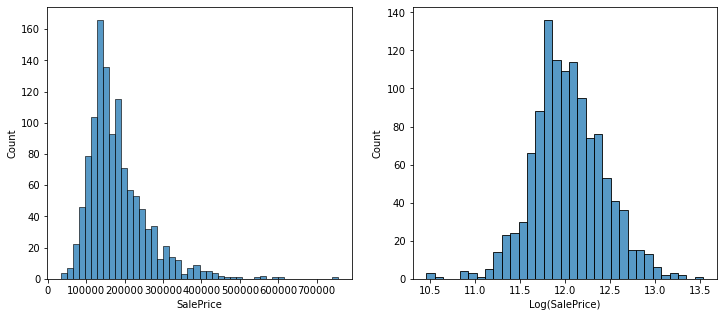

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

#histogram of dependent variable
sale_price = train_data["SalePrice"]
sns.histplot(sale_price, ax=ax[0])
log_sale_price = pd.Series(np.log(sale_price), name='Log(SalePrice)')
sns.histplot(log_sale_price, ax=ax[1])

The dependent variable "SalePrice" is right skewed, and log transformation can be applied to make it normally distributed. 

In [5]:
#Replace dependent variable with log transform
train_data["SalePrice"] = np.log(train_data["SalePrice"])
dev_data["SalePrice"] = np.log(dev_data["SalePrice"])

### Visualize the Correlation

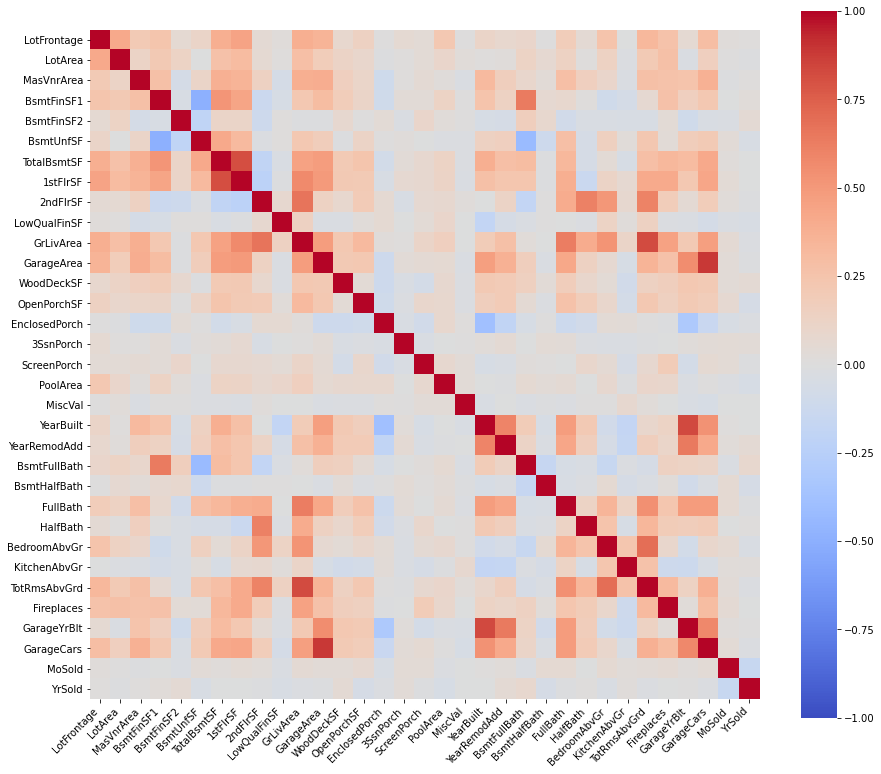

In [6]:
plt.figure(figsize = (15,13))
#correlation values between continuous and discrete variables
corr = train_data[cols_cont+cols_disc].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The graph shows that:
* TotalBsmtSF (Total square feet of basement area) has relatively high correlation with 1stFlrSF (First Floor square feet).
* GarageCars (Size of garage in car capacity) has high correlation with GarageArea (Size of garage in square feet).
* The relationship makes sense, as the larger first floor, the bigger basement area. Same for garage car and garage area. 
* These independent variables are examined to determine if they have perfect multicollinearity. If perfect multicolloinearity exists, one will need to be removed. If not, they can be kept. 

In [7]:
print( "Correlation between TotalBsmtSF and 1stFlrSF: %.4f" % train_data["TotalBsmtSF"].corr(train_data["1stFlrSF"]))
print( "Correlation between GarageCars and GarageArea: %.4f" % train_data["GarageCars"].corr(train_data["GarageArea"]))

Correlation between TotalBsmtSF and 1stFlrSF: 0.8183
Correlation between GarageCars and GarageArea: 0.8855


Although not perfect, these variables have a high multicollinearity. These need to be handled in the modelling section in order to improve the results. One way to handle these is dropping one of the variables. Another way is to use regularization to prevent unstable coefficient estimates.

### Top Numeric Features (Ordinal, Continuous, Discrete)

In [8]:
# find out the top 10 correlated variables to 'SalePrice'
train_data.corrwith(train_data['SalePrice']).abs().sort_values(ascending=False)[1:11]

OverallQual    0.809968
GrLivArea      0.690457
GarageCars     0.681125
ExterQual      0.667004
GarageArea     0.650997
KitchenQual    0.649039
BsmtQual       0.645267
FullBath       0.606642
TotalBsmtSF    0.601418
1stFlrSF       0.593658
dtype: float64

The top 10 variables fall into two categories, proxying house size and build quality. The relationship between SalePrice and each of them will be checked: 
* The first group captures the size information ['GrLivArea', 'GarageCars', 'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF'].
* The second group captures build quality ['OverallQual','ExterQual', 'KitchenQual', 'BsmtQual'].

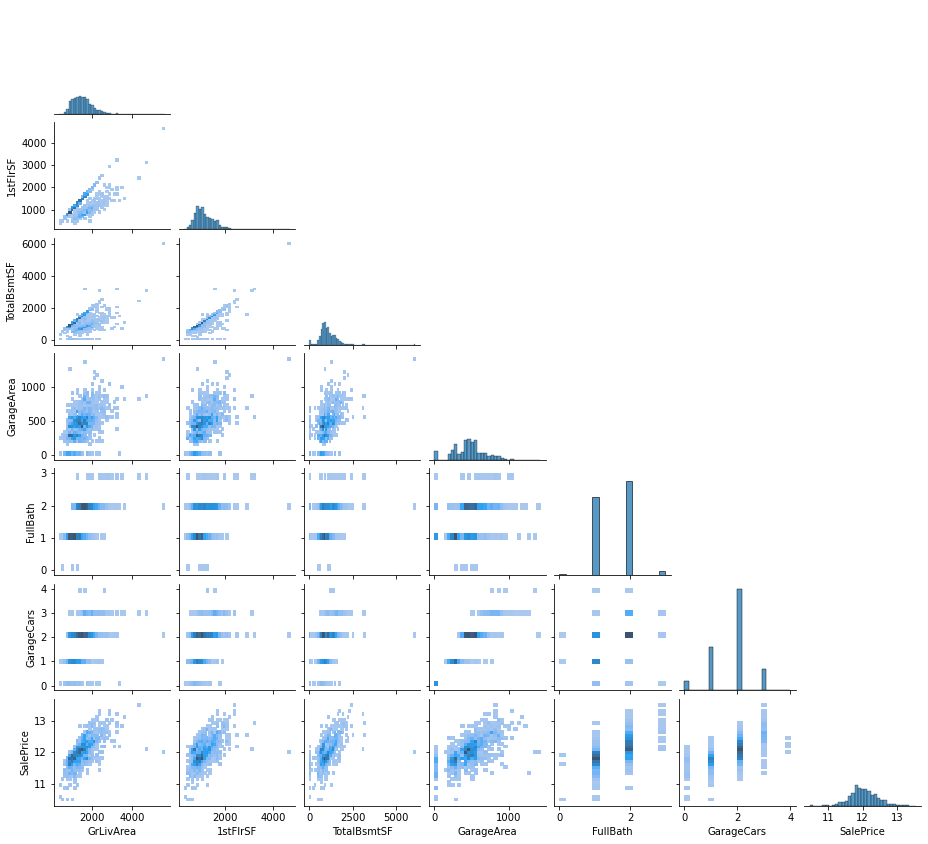

In [9]:
#Correlation scatterplots between top size variables
cols = ['GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'FullBath', 'GarageCars', 'SalePrice']
sns.pairplot(train_data[cols], height=1.7, aspect=1.1, corner=True, kind='hist')

From the chart above, a couple observations are drawn:
* Focusing on the last row, relationship of size features and SalePrice (which is actually log of SalePrice) are linear.
* There are a few observations that seem to be outliers with SalePrice meaningfully lower than implied by the size of the house.
* Most homes have 1-2 full bath and 1-3 car capacity.

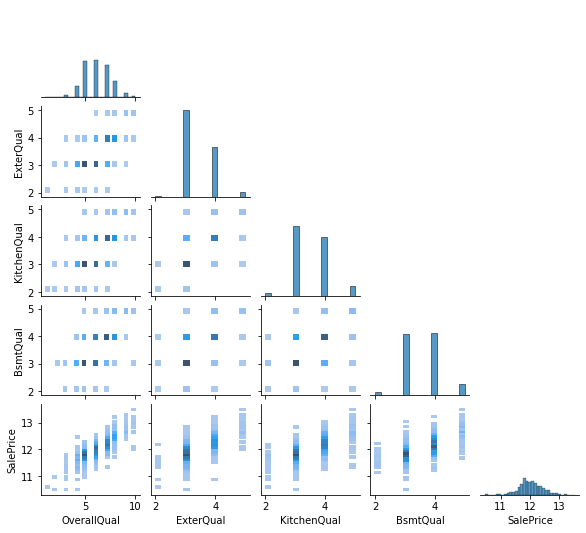

In [10]:
#Correlation scatterplots between top quality variables
cols = ['OverallQual','ExterQual', 'KitchenQual', 'BsmtQual', 'SalePrice']
sns.pairplot(train_data[cols], height=1.5, aspect=1.1, corner=True, kind='hist')

From the chart above, the following observations are drawn:
* Focusing on the last row, relationship between quality features and SalePrice also seem to be linear.
* Unsurprisingly, the quality features are positively correlated among themselves.

### Top Nominal Features

In [11]:
#Determine top nominal features based on R^2 value in univariate OLS regression
model = LinearRegression()
rsq = []
for col in cols_nominal:
    df = pd.get_dummies(train_data[[col, 'SalePrice']], drop_first=True)
    X = df.iloc[:,1:]
    y = df['SalePrice']
    fit = model.fit(X, y)
    yhat = fit.predict(X)
    rsq.append(1 - sum((y - yhat)**2) / sum((y - y.mean())**2))
    
print('Top Nominal Features')
print(pd.DataFrame({'feature': cols_nominal, 'rsq': rsq}).sort_values('rsq', ascending=False).head(10))

Top Nominal Features
          feature       rsq
6    Neighborhood  0.568543
0      MSSubClass  0.320935
19     GarageType  0.320192
16     Foundation  0.299699
15     MasVnrType  0.186672
13    Exterior1st  0.179846
1        MSZoning  0.169657
14    Exterior2nd  0.163080
22  SaleCondition  0.144165
21       SaleType  0.126531


From the correlation table above, it can be seen that Neighborhood, MSSubClass, GarageType and Foundation have meaningful predictive power for SalePrice.

## Missing data

In [12]:
#Print out variables that are missing data, the count missing, the percent missing, and the variable type
def missing_data(df):    
    missing_count = df.isnull().sum().sort_values(ascending = False)
    missing_percent = missing_count / (df.isnull().count())
    missing_percent= missing_percent.sort_values(ascending = False)
    missing = pd.concat([missing_count,missing_percent], axis = 1, 
                        keys = ['Missing Count', "Missing Percent"], sort=False)
    missing = missing[missing["Missing Count"] >0]
    missing = missing.join(col_types).sort_values(['type', 'Missing Count'], ascending=False)
    return missing

print(missing_data(train_data_raw))
print(missing_data(test_data))

              Missing Count  Missing Percent     type
PoolQC                 1453         0.995205  ordinal
Fence                  1179         0.807534  ordinal
FireplaceQu             690         0.472603  ordinal
GarageCond               81         0.055479  ordinal
GarageFinish             81         0.055479  ordinal
GarageQual               81         0.055479  ordinal
BsmtExposure             38         0.026027  ordinal
BsmtFinType2             38         0.026027  ordinal
BsmtCond                 37         0.025342  ordinal
BsmtQual                 37         0.025342  ordinal
BsmtFinType1             37         0.025342  ordinal
Electrical                1         0.000685  ordinal
MiscFeature            1406         0.963014  nominal
Alley                  1369         0.937671  nominal
GarageType               81         0.055479  nominal
MasVnrType                8         0.005479  nominal
GarageYrBlt              81         0.055479     disc
LotFrontage             259 

There are missing values in the original train and test dataset. 
* For nominal features, they will be filled with 'None' values. 
* For other values including ordinal, continuous and discrete, it is assumed the items do not exist (e.g. garage, fireplace) which is worse than having it in poor condition or low values, and thus filled with 0. 
* The exception is GarageYrBlt, which we will fill with YearBuilt instead of 0.

In [13]:
def fill_miss(df):
   
    #Replace missing nominal features with None
    df[cols_nominal] = df[cols_nominal].fillna("None")
    
    #Replace missing ordinal features with 0 
    df[cols_ordinal] = df[cols_ordinal].fillna(0)

    #Replace missing continuous features with 0
    df[cols_cont] = df[cols_cont].fillna(0)

    #Replace missing GarageYrBlt with YearBuilt
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
    
    #Replace missing discrete features with 0
    df[cols_disc] = df[cols_disc].fillna(0)
    
    return df

train_data = fill_miss(train_data)
dev_data = fill_miss(dev_data)
test_data = fill_miss(test_data)

#check all missing data has been handled
print(missing_data(train_data))
print(missing_data(dev_data))
print(missing_data(test_data))

Empty DataFrame
Columns: [Missing Count, Missing Percent, type]
Index: []
Empty DataFrame
Columns: [Missing Count, Missing Percent, type]
Index: []
Empty DataFrame
Columns: [Missing Count, Missing Percent, type]
Index: []


Standard scaling is applied to numeric features (ordinal, continuous, discrete) and one hot encoding for nominal features. Feature transformation is done on the entire data set including train, dev and test.

In [14]:
# scaling & encoding
cat_attribs = cols_nominal
num_attribs = cols_ordinal + cols_cont + cols_disc

#StandardScaling for numeric features, one-hot encoding for categorical features
#First category in encoding is dropped to prevent multicollinearity 
full_pipeline = ColumnTransformer(transformers = [
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(drop='first', sparse=False), cat_attribs),
    ])

full_data = pd.concat([train_data.drop(['SalePrice'], axis=1),
                       dev_data.drop(['SalePrice'], axis=1), 
                       test_data])
full_pipeline.fit(full_data)

# transform
train_prepared = full_pipeline.transform(train_data.drop(['SalePrice'], axis=1))
dev_prepared = full_pipeline.transform(dev_data.drop(['SalePrice'], axis=1))
test_prepared = full_pipeline.transform(test_data)

# column names and indices
expanded_cat_attribs = full_pipeline.named_transformers_['cat'].get_feature_names(cat_attribs)
num_attribs.extend(expanded_cat_attribs)

train_prepared = pd.DataFrame(train_prepared, columns=num_attribs, index=train_data.index)
dev_prepared = pd.DataFrame(dev_prepared, columns=num_attribs, index=dev_data.index)
test_prepared = pd.DataFrame(test_prepared, columns=num_attribs, index=test_data.index)

# add back y
train_prepared['SalePrice'] = train_data['SalePrice']
dev_prepared['SalePrice'] = dev_data['SalePrice']

# for model building
X_train = train_prepared.drop(['SalePrice'], axis=1)
y_train = train_prepared['SalePrice']

X_dev = dev_prepared.drop(['SalePrice'], axis=1)
y_dev = dev_prepared['SalePrice']

X_test = test_prepared

#Check data shape to ensure transformation was evenly applied
print("train data: {}, dev data: {}, test data: {}".format(X_train.shape, X_dev.shape, X_test.shape))

train data: (1168, 217), dev data: (292, 217), test data: (1459, 217)


## Baseline Models

In [15]:
%%capture --no-stdout

print("------------- Predict Mean -------------")

#Predict the mean SalePrice for all inputs
y_pred = np.repeat(np.mean(y_train), len(y_dev))

rmse = round(np.sqrt(mean_squared_error(y_dev, y_pred)),3)
print("RMSE: =", rmse)

print("------------- Linear Regression w/ Top 2 Variables -------------")

cols = ['OverallQual', 'GrLivArea']

#Simple linear regression 
lreg = LinearRegression() 
lreg.fit(X_train[cols], y_train)
y_pred = lreg.predict(X_dev[cols])

rmse = round(np.sqrt(mean_squared_error(y_dev, y_pred)),3)
print("RMSE: =", rmse)

print("------------- Linear Regression w/ Top 2 Variables + Neighborhood -------------")

cols = ['OverallQual', 'GrLivArea']
cols.extend([col for col in X_train.columns.values if col.startswith('Neighborhood')])

#Simple linear regression 
lreg = LinearRegression() 
lreg.fit(X_train[cols], y_train)
y_pred = lreg.predict(X_dev[cols])

rmse = round(np.sqrt(mean_squared_error(y_dev, y_pred)),3)
print("RMSE: =", rmse)

print("------------- Lasso -------------")

#Linear regression with L1 regularization
lasso = Lasso()

#Determine optimal alpha value via CrossValidation
param_grid = {'alpha': np.logspace(-4, 1, 20)}
mse = make_scorer(mean_squared_error, greater_is_better=False)
clf_cv = GridSearchCV(lasso, param_grid, cv=5, scoring=mse)
clf_cv.fit(X_train, y_train)
print(clf_cv.best_params_)

#Fit and predict
lasso = Lasso(alpha=clf_cv.best_params_['alpha'], random_state=12345)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_dev)

rmse = round(np.sqrt(mean_squared_error(y_dev, y_pred)),3)
print('total features: {}, selected features: {}'.format(len(lasso.coef_), np.sum(lasso.coef_ != 0)))
print("RMSE: =", rmse)

------------- Predict Mean -------------
RMSE: = 0.419
------------- Linear Regression w/ Top 2 Variables -------------
RMSE: = 0.19
------------- Linear Regression w/ Top 2 Variables + Neighborhood -------------
RMSE: = 0.168
------------- Lasso -------------
{'alpha': 0.0011288378916846883}
total features: 217, selected features: 83
RMSE: = 0.137


There are four baseline predictions implented.
* Without any modeling, predciting the mean gives RMSE of 0.419.
* Using OLS regression with top 2 variables capturing overall size and quality, RMSE is reduced to 0.19. This is at 80th percentile on Kaggle leadership board.
* Using OLS regression with an additional feature of Neighborhood reduces RMSE to 0.168, or 75th percentile. 
* Using Lasso with all features and alpha chosen by cross validation,  a RMSE of 0.137, or 40th percentile, is achieved.

Text(0.5, 1.0, 'Lasso Regression Feature Weights')

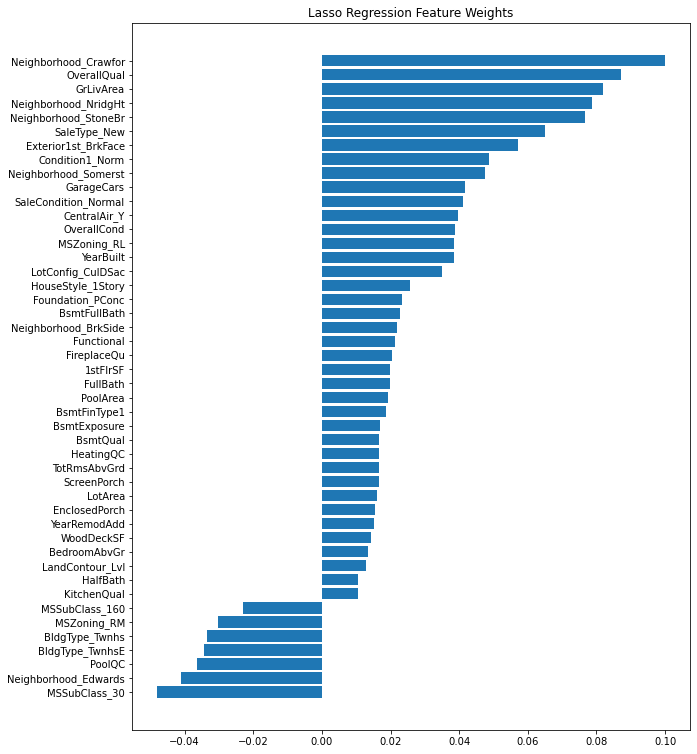

In [16]:
#Visualize all coefficients for the Lasso model
lasso_coef = pd.DataFrame(data = lasso.coef_, 
                             index=X_train.columns, 
                             columns=['Coef']).\
                        sort_values(by = 'Coef', ascending=True)
lasso_coef = lasso_coef.loc[np.abs(lasso_coef['Coef'])>0.01,:]

fig, ax = plt.subplots(figsize=(10,13))
ax.barh(lasso_coef.index, lasso_coef.Coef)
ax.set_title('Lasso Regression Feature Weights')

Above, the top coefficients learned by the Lasso regression are plotted. All of these make intuitive sense.
* Unsurprisingly, Neighborhood, OverallQual and GrLivArea have large effects.
* Some condition nominal variables are also important, including Condition1 (proximity to various conditions, e.g. railroad, etc), SaleType (new houses are more expensive).
* YearBuilt and YearRemodAdd is also important.

## Error Analysis

### Performance (Error) vs. Complexity

alpha= 0.00001, Train RMSE: 0.094, Dev RMSE: 0.190, Selected Features: 200
alpha= 0.00002, Train RMSE: 0.094, Dev RMSE: 0.187, Selected Features: 196
alpha= 0.00002, Train RMSE: 0.094, Dev RMSE: 0.181, Selected Features: 192
alpha= 0.00004, Train RMSE: 0.095, Dev RMSE: 0.172, Selected Features: 185
alpha= 0.00006, Train RMSE: 0.097, Dev RMSE: 0.161, Selected Features: 177
alpha= 0.00009, Train RMSE: 0.099, Dev RMSE: 0.148, Selected Features: 170
alpha= 0.00013, Train RMSE: 0.105, Dev RMSE: 0.140, Selected Features: 162
alpha= 0.00020, Train RMSE: 0.108, Dev RMSE: 0.137, Selected Features: 141
alpha= 0.00031, Train RMSE: 0.112, Dev RMSE: 0.138, Selected Features: 128
alpha= 0.00047, Train RMSE: 0.115, Dev RMSE: 0.137, Selected Features: 112
alpha= 0.00073, Train RMSE: 0.118, Dev RMSE: 0.136, Selected Features: 94
alpha= 0.00112, Train RMSE: 0.122, Dev RMSE: 0.137, Selected Features: 83
alpha= 0.00172, Train RMSE: 0.127, Dev RMSE: 0.139, Selected Features: 67
alpha= 0.00263, Train RMSE: 

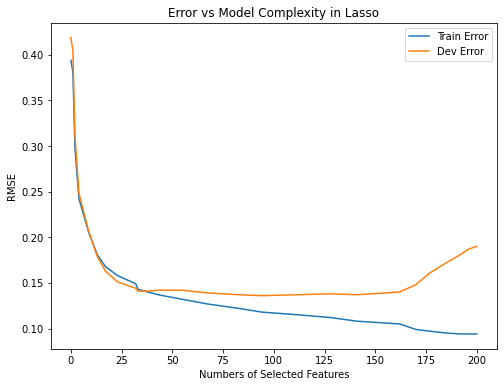

In [17]:
# plot selected features vs RMSE 
alphas = np.logspace(-5, 0.4, 30)
lasso_feature_number = []
dev_rmse_list = []
train_rmse_list = []

for a in alphas:
    
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    
    train_pred = lasso.predict(X_train)
    train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),3)
    train_rmse_list.append(train_rmse)
    
    dev_pred = lasso.predict(X_dev)
    dev_rmse = round(np.sqrt(mean_squared_error(y_dev, dev_pred)),3)
    dev_rmse_list.append(dev_rmse)
    
    features = np.sum(lasso.coef_ != 0)
    lasso_feature_number.append(features)
    
    print("alpha= %.5f, Train RMSE: %.3f, Dev RMSE: %.3f, Selected Features: %d"%(a, train_rmse, dev_rmse, features))
    
fig = plt.figure(figsize=(8, 6))
plt.plot(lasso_feature_number, train_rmse_list, label='Train Error')
plt.plot(lasso_feature_number, dev_rmse_list, label='Dev Error')
plt.legend()
plt.xlabel("Numbers of Selected Features")
plt.ylabel("RMSE")
plt.title("Error vs Model Complexity in Lasso")
plt.show()

As alpha incrases, regularization strength increases, reducing the number of features selected and model complexity.
* When there are less than 30 features (alpha ~= 0.01), adding features improves performance on both train and dev.
* From 30 to 150 features, train error continues to go down, but dev error doesn't improve much. The optimal alpha chosen in baseline by cross-validation is 0.00113, producing 83 features, falls on this part of the graph. Conceptually, some overfitting is tolerated, so long as it improves prediction. 
* When beyond 150 features, dev performance starts to deteriorate, significantly overfitting.

### Learning Curve

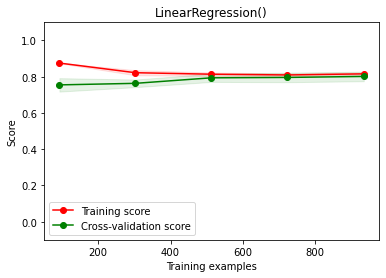

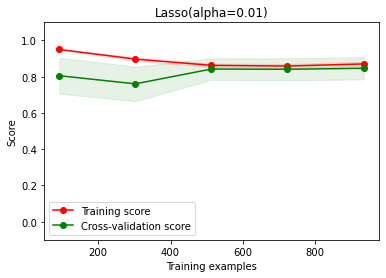

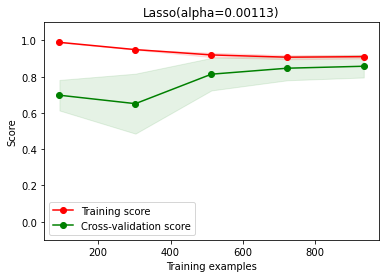

In [18]:
#Plot change in training and dev scores over number of data samples processed 
def plot_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(model)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc = 3, labels=["Training score", "Cross-validation score"])
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.grid()
    plt.ylim(-.1,1.1)
    plt.show()

plot_curve(lreg, X_train[cols], y_train)
plot_curve(Lasso(alpha=0.01), X_train, y_train)
plot_curve(Lasso(alpha=0.00113), X_train, y_train)

For a given model, another way to assess overfitting is by plotting performance against training example size.
* Linear model training score is low at 0.8. The model is underfitting and adding more complexity will help. It makes sense b/c this model only uses GrLivArea, OverallQual and Neighborhood as predictors. Adding additional features should be considered. 
* Lasso model with alpha = 0.01 (~30 features) doesn't overfit, as train score and cv score are in line.
* Lasso model with alpha = 0.00113 (~80 features) training score is at 0.9, while cv score is lower at 0.85. The training score can potentially be improved by additional useful features, while the lower cv score indicates that there is some overfitting.

### Check Source of Errors
#### Errors in train_data

In [19]:
lasso = Lasso(alpha=clf_cv.best_params_['alpha'], random_state=12345)
lasso.fit(X_train, y_train)
y_pred_dev = lasso.predict(X_dev)
y_pred_train = lasso.predict(X_train)

In [20]:
# show top 10 rows which have the largest errors from the prediction in the train data set
pd.set_option('display.max_columns', None)
top_10 = np.argsort(abs(y_train - y_pred_train))[::-1][:10]

#Copy of train data for error analysis
train_data_e = train_data.copy()
train_data_e["SalePrice_pred"] = y_pred_train
train_data_e["Error"] = y_train - y_pred_train
train_data_e.iloc[top_10]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_pred,Error
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,None,1,Bnk,4,Corner,3,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5.0,3.0,4.0,6.0,5644,1.0,0,466,6110,GasA,5,Y,5.0,4692,950,0,5642,2,0,2,1,3,1,5,12,6,3,4.0,Attchd,2008.0,3.0,2,1418,3.0,3.0,3,214,292,0,0,0,480,4.0,0.0,None,0,1,2008,New,Partial,11.982929,13.253701,-1.270772
524,60,RL,130.0,40094,Pave,None,3,Bnk,4,Inside,3,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,5,3,PConc,5.0,3.0,4.0,6.0,2260,1.0,0,878,3138,GasA,5,Y,5.0,3138,1538,0,4676,1,0,3,1,3,1,5,11,6,1,4.0,BuiltIn,2007.0,3.0,3,884,3.0,3.0,3,208,406,0,0,0,0,0.0,0.0,None,0,10,2007,New,Partial,12.126759,13.335421,-1.208662
496,30,C (all),60.0,7879,Pave,None,4,Lvl,4,Inside,3,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3.0,3.0,1.0,3.0,495,1.0,0,225,720,GasA,3,N,4.0,720,0,0,720,0,0,1,0,2,1,3,4,6,0,0.0,None,1920.0,0.0,0,0,0.0,0.0,1,0,523,115,0,0,0,0.0,2.0,None,0,11,2009,WD,Abnorml,10.460242,11.167641,-0.707398
633,20,RL,85.0,11900,Pave,None,4,Lvl,4,Inside,3,NWAmes,Norm,Norm,1Fam,1Story,7,5,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,209.0,3,4,CBlock,3.0,3.0,1.0,5.0,822,1.0,0,564,1386,GasA,3,Y,5.0,1411,0,0,1411,0,0,2,0,3,1,3,6,6,1,3.0,Attchd,1977.0,3.0,2,544,3.0,3.0,3,192,0,0,0,0,0,0.0,0.0,None,0,4,2009,WD,Family,11.320554,12.024359,-0.703805
917,20,C (all),50.0,9000,Pave,None,4,Lvl,4,Inside,3,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,CBlock,3.0,3.0,3.0,4.0,50,1.0,0,430,480,GasA,3,N,4.0,480,0,0,480,1,0,0,0,1,1,3,4,6,0,0.0,Detchd,1958.0,1.0,1,308,3.0,3.0,3,0,0,0,0,0,0,0.0,0.0,None,0,10,2006,WD,Abnorml,10.471950,11.117251,-0.645302
1325,20,RL,75.0,9986,Pave,None,4,Lvl,4,Inside,3,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,428.0,4,3,PConc,5.0,3.0,3.0,1.0,0,1.0,0,1795,1795,GasA,5,Y,5.0,1795,0,0,1795,0,0,2,0,2,1,4,7,6,1,4.0,Attchd,2007.0,2.0,3,895,3.0,3.0,3,0,49,0,0,0,0,0.0,0.0,None,0,2,2007,New,Partial,11.898188,12.512135,-0.613947
969,50,RM,50.0,5925,Pave,None,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,BrkTil,3.0,3.0,1.0,1.0,0,1.0,0,600,600,Grav,2,N,5.0,600,368,0,968,0,0,1,0,2,1,3,6,6,0,0.0,None,1910.0,0.0,0,0,0.0,0.0,3,0,0,0,0,0,0,0.0,2.0,None,0,5,2009,WD,Abnorml,10.542706,11.101762,-0.559055
971,50,RL,60.0,10800,Pave,None,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1.5Fin,4,4,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,CBlock,3.0,3.0,1.0,1.0,0,1.0,0,720,720,GasA,3,N,4.0,720,472,0,1192,0,0,1,1,4,1,3,6,6,0,0.0,None,1949.0,0.0,0,0,0.0,0.0,3,0,0,0,0,0,0,0.0,0.0,None,0,12,2006,WD,Abnorml,11.813030,11.346053,0.466977
1171,80,RL,76.0,9880,Pave,None,4,Lvl,4,Inside,3,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3.0,3.0,3.0,5.0,522,1.0,0,574,1096,GasA,3,Y,5.0,1118,0,0,1118,1,0,1,0,3,1,3,6,6,1,1.0,Attchd,1977.0,3.0,1,358,3.0,3.0,3,203,0,0,0,0,576,4.0,2.0,None,0,7,2008,WD,Normal,12.049419,11.617

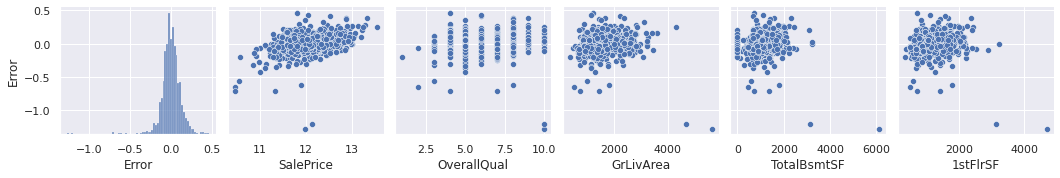

In [21]:
#Plot distribution of error for SalePrice and top indicators
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(data=train_data_e, y_vars=['Error'], x_vars=['Error']+cols)
plt.show();

In [22]:
#Output outliers
train_data_e.loc[train_data_e["Error"] < -1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_pred,Error
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,None,1,Bnk,4,Corner,3,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5.0,3.0,4.0,6.0,5644,1.0,0,466,6110,GasA,5,Y,5.0,4692,950,0,5642,2,0,2,1,3,1,5,12,6,3,4.0,Attchd,2008.0,3.0,2,1418,3.0,3.0,3,214,292,0,0,0,480,4.0,0.0,None,0,1,2008,New,Partial,11.982929,13.253701,-1.270772
524,60,RL,130.0,40094,Pave,None,3,Bnk,4,Inside,3,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,5,3,PConc,5.0,3.0,4.0,6.0,2260,1.0,0,878,3138,GasA,5,Y,5.0,3138,1538,0,4676,1,0,3,1,3,1,5,11,6,1,4.0,BuiltIn,2007.0,3.0,3,884,3.0,3.0,3,208,406,0,0,0,0,0.0,0.0,None,0,10,2007,New,Partial,12.126759,13.335421,-1.208662


* In training data, there are two outliers with very negative errors. Actual prices are meaningfully lower than predicted prices. These properties have very high quality and living area, and one would expect them to sell for a much higher price than log(SalePrice)~=12. These homes were sold in 2007 and 2008 when they were not fully completed (SaleCondition = Partial). However, median SalePrice by year and SaleCondition do not suggest that these are the causes for abnormally low SalePrice. 
* Median SalePrice by YrSold chart does suggest that our earlier treatment of YrSold as discrete variable is improper, which assumes a linear relationship. Thus, it will be treated as nominal variable in feature engineering section later.
* For the two outlier points, the decision was made to remove them so they do not affect the estimates disproportionally.
* There is another cluster of points where error is between -0.5 and -1. However, these were less outsizes, so they are kept in the data set for now.

Text(0.5, 1.0, 'Median SalePrice by Year')

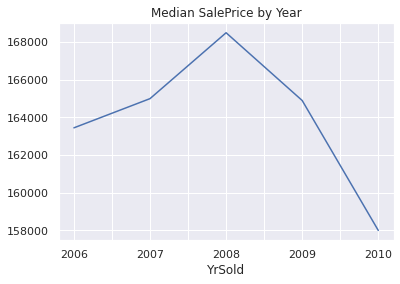

In [23]:
train_data_e['YrSold'] = train_data_e['YrSold'].astype('str')
np.exp(train_data_e.groupby('YrSold')['SalePrice'].median()).plot()
plt.title('Median SalePrice by Year')

#### Errors in Dev Predictions

In [24]:
# show top 10 rows which have the largest errors from the prediction in the dev data set
pd.set_option('display.max_columns', None)
top_10 = np.argsort(abs(y_dev - y_pred_dev))[::-1][:10]

#Copy of dev data for error analysis
dev_data_e = dev_data.copy()
dev_data_e["SalePrice_pred"] = y_pred
dev_data_e["Error"] = y_dev - y_pred_dev
dev_data_e.iloc[top_10]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_pred,Error
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31,70,C (all),50.0,8500,Pave,Pave,4,Lvl,4,Inside,3,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,3,2,BrkTil,3.0,3.0,1.0,1.0,0,1.0,0,649,649,GasA,3,N,5.0,649,668,0,1317,0,0,1,0,3,1,3,6,6,0,0.0,Detchd,1920.0,1.0,1,250,3.0,2.0,1,0,54,172,0,0,0,0.0,1.0,None,0,7,2008,WD,Normal,10.596635,11.431594,-0.834959
1183,60,RL,160.0,15623,Pave,None,3,Lvl,4,Corner,3,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,4,3,PConc,5.0,3.0,3.0,6.0,2096,1.0,0,300,2396,GasA,5,Y,5.0,2411,2065,0,4476,1,0,3,1,4,1,5,10,6,2,3.0,Attchd,1996.0,3.0,3,813,3.0,3.0,3,171,78,0,0,0,555,5.0,1.0,None,0,7,2007,WD,Abnorml,13.521139,12.744795,0.776345
463,20,RL,60.0,8281,Pave,None,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3.0,3.0,1.0,3.0,553,4.0,311,0,864,GasA,4,Y,5.0,864,0,0,864,0,0,1,0,3,1,3,5,6,1,1.0,Detchd,1965.0,1.0,1,360,3.0,3.0,3,0,0,236,0,0,0,0.0,2.0,None,0,12,2009,WD,Normal,11.041048,11.703036,-0.661988
813,20,C (all),66.0,8712,Grvl,None,4,Bnk,4,Inside,2,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,3,CBlock,3.0,3.0,3.0,1.0,0,1.0,0,540,540,GasA,3,N,4.0,1044,0,0,1044,0,0,1,0,2,1,2,4,6,0,0.0,Basment,1952.0,1.0,2,504,3.0,3.0,1,0,0,0,0,0,0,0.0,0.0,Shed,54,6,2010,WD,Alloca,10.932982,11.476012,-0.543030
1433,30,RL,60.0,10800,Pave,Grvl,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1Story,4,6,1927,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3.0,3.0,1.0,1.0,0,1.0,0,656,656,GasA,3,Y,5.0,968,0,0,968,0,0,2,0,4,1,3,5,6,0,0.0,Detchd,1928.0,1.0,1,216,2.0,2.0,3,0,0,0,0,0,0,0.0,0.0,None,0,8,2007,WD,Normal,11.074421,11.553753,-0.479333
4,70,RL,60.0,9550,Pave,None,3,Lvl,4,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,4,Y,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,6,1,4.0,Detchd,1998.0,1.0,3,642,3.0,3.0,3,0,35,272,0,0,0,0.0,0.0,None,0,2,2006,WD,Abnorml,11.849398,12.203144,-0.353747
143,50,RL,71.0,8520,Pave,None,4,Lvl,4,Corner,3,NAmes,Artery,Norm,1Fam,1.5Fin,5,4,1952,1952,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,3,2,CBlock,3.0,3.0,1.0,3.0,507,1.0,0,403,910,GasA,2,Y,5.0,910,475,0,1385,0,0,2,0,4,1,3,6,6,0,0.0,Detchd,2000.0,1.0,2,720,3.0,3.0,3,0,0,0,0,0,0,0.0,1.0,None,0,6,2010,WD,Normal,12.019743,11.713476,0.306267
886,120,FV,50.0,5119,Pave,None,3,Lvl,4,CulDSac,3,Somerst,Norm,Norm,TwnhsE,1Story,9,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,60.0,4,3,PConc,5.0,3.0,3.0,6.0,1238,1.0,0,460,1698,GasA,5,Y,5.0,1709,0,0,1709,1,0,2,0,2,1,4,5,6,1,3.0,Attchd,1999.0,3.0,2,506,3.0,3.0,3,97,65,0,0,0,0,0.0,0.0,None,0,1,2008,CWD,Abnorml,12.703509,12.436919,0.266590
773,80,RL,94.0,7819,Pave,None,4,Lvl,4,Inside,3,Edwards,Norm,Norm,1Fam,SLvl,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3.0,3.0,3.0,5.0,422,4.0,127,480,1029,GasA,3,Y,5.0,1117,0,0,1117,1,0,1,0,3,1,3,6,6,1,3.0,Detchd,1976.0,1.0,2,672,3.0,3.0,3,144,0,0,0,0,0,0.0,1.0,None,0,3,2010,WD,Abnorml,11.580584,11.845745,-0.265

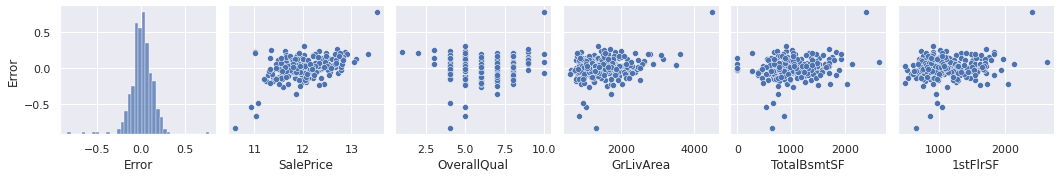

In [25]:
#Plot distribution of error for SalePrice and top indicators
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(data=dev_data_e, y_vars=['Error'], x_vars=['Error']+cols)
plt.show();

* Errors are roughly normally distributed and centered around zero. However, there is also a tail of large errors.
* It seems that for the cheapest homes, the model is overforecasting, while for the most expensive home, it underforecasted. Removing the two outliers in the training set should provide some help.

## Feature Engineering

#### Separate Neighorhood into Bins
This is based on the idea that
* Neighborhood is a proxy for rich and poor areas.
* Houses at different price points might have different feature effects.

In [26]:
neigborhood_price = train_data["SalePrice"].groupby(train_data["Neighborhood"]).median().sort_values()
neigborhood_price

Neighborhood
MeadowV    11.356255
BrDale     11.512925
IDOTRR     11.540307
OldTown    11.695247
BrkSide    11.706019
Blueste    11.728037
Edwards    11.745970
Sawyer     11.825908
SWISU      11.831015
NAmes      11.860049
NPkVill    11.891362
Mitchel    11.957611
Gilbert    12.118334
NWAmes     12.122403
SawyerW    12.133217
Blmngtn    12.162640
Veenker    12.175613
CollgCr    12.185611
ClearCr    12.259613
Crawfor    12.289954
Somerst    12.326073
Timber     12.424806
StoneBr    12.549562
NoRidge    12.577636
NridgHt    12.659734
Name: SalePrice, dtype: float64

In [27]:
#Sort neighborhoods into bins
neighborhood_map = {
        "MeadowV" : 1,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 1,    # 139500
        "NAmes" : 1,    # 140000
        "NPkVill" : 1,  # 146000
        "Mitchel" : 1,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 2,  # 200250
        "Crawfor" : 2,  # 200624
        "Veenker" : 2,  # 218000
        "Somerst" : 2,  # 225500
        "Timber" : 2,   # 228475
        "StoneBr" : 3,  # 278000
        "NoRidge" : 3,  # 290000
        "NridgHt" : 3,  # 315000
    }

#Create variable containing NeighborhoodBin
train_data["NeighborhoodBin"] = train_data["Neighborhood"].map(neighborhood_map)
dev_data["NeighborhoodBin"] = dev_data["Neighborhood"].map(neighborhood_map)
test_data["NeighborhoodBin"] = test_data["Neighborhood"].map(neighborhood_map)
print("train data: {}, dev data: {}, test data: {}".format(train_data.shape, dev_data.shape, test_data.shape))

train data: (1168, 81), dev data: (292, 81), test data: (1459, 80)


* The neighborhoods are sorted based on the median of the sale price and seperated in 3 groups, 1 represents cheap neighborhood, 2 represents average neighborhood, while 3 represents expensive neighborhood.

In [28]:
# add new features
def add_new_features(df):
    
    #Average sqft per room
    df["AvgRmSF"] = df["GrLivArea"]/df["TotRmsAbvGrd"]
    
    #total sqft in house
    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]

    #total number of bathrooms in house
    df["Total_bath"] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                                   df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

    #Total size of porch
    df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                                  df['EnclosedPorch'] + df['ScreenPorch'] +
                                  df['WoodDeckSF'])
    return df

train_data = add_new_features(train_data)
dev_data = add_new_features(dev_data)
test_data = add_new_features(test_data)

cols_cont.extend(['AvgRmSF', 'TotalSF', 'Total_bath', 'Total_porch_sf'])
print("train data: {}, dev data: {}, test data: {}".format(train_data.shape, dev_data.shape, test_data.shape))

train data: (1168, 85), dev data: (292, 85), test data: (1459, 84)


* In the EDA and baseline models, size variables were significant. However, there is some multicollinearity among them. To reduce this, a few features have been combined into an aggregate feature. With Lasso performing L1 regularization, these features will be picked up over the individuals. 

In [29]:
#create binary variables for models
def create_binary(df):    
    df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    return df
    
train_data = create_binary(train_data)
dev_data = create_binary(dev_data)
test_data = create_binary(test_data)

cols_disc.extend(['haspool', 'hasgarage', 'hasbsmt', 'hasfireplace'])
print("train data: {}, dev data: {}, test data: {}".format(train_data.shape, dev_data.shape, test_data.shape))

train data: (1168, 89), dev data: (292, 89), test data: (1459, 88)


* Creating binary features to simplify some skewed numeric features. For example, in the dataset, 99% of houses in the test set do not have pools, and 5% of them do not have garages. Their distributions are heavily focused on left side (close to zero). Rather than focusing on the size or quality of these amenities, these variables simply state the existence of the amenity

In [30]:
# YrSinceReM year since remodeling
def YrSinceReM(df):
    df['YrSinceReM'] = df["YrSold"] - df["YearRemodAdd"]
    return df

train_data = YrSinceReM(train_data)
dev_data = YrSinceReM(dev_data)
test_data = YrSinceReM(test_data)  

cols_cont.extend(['YrSinceReM'])

* In order to capture the "newness" of the home, the remodelling should also be taken into account. This variable considers how long it has been since remodelling. 

<AxesSubplot:xlabel='YrSold,MoSold'>

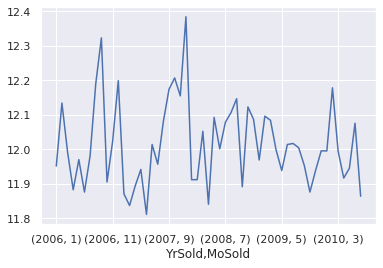

In [31]:
#Plot the sale price vs year and month sold
train_data.groupby(['YrSold', 'MoSold'])['SalePrice'].median().plot()

In [32]:
 # MoSold feature to nominal as well, turn into spring, fall, summer, winter & interact with YrSold
def add_season(df):
    season = []
    for i in df["MoSold"]:
        season_index = i%12//3 +1
        if season_index == 1:
            season.append("winter")
        if season_index == 2:
            season.append("spring")
        if season_index == 3:
            season.append("summer")
        if season_index == 4:
            season.append("fall")

    df["Season"]=season
    # make year and month and season as nominal Variables

    df["YrSold"] = df["YrSold"].astype(str)
    df["MoSold"] = df["MoSold"].astype(str)
    df["Year_Season"] = df['YrSold']+df["Season"]
    
    return df

train_data = add_season(train_data)
dev_data = add_season(dev_data)
test_data = add_season(test_data)    

cols_nominal.extend(['YrSold','MoSold','Year_Season','Season'])
cols_disc.remove('YrSold')
cols_disc.remove('MoSold')# MoSold feature to nominal as well, turn into spring, fall, summer, winter & interact with YrSold


* As seen in the chart above, there is some cyclical seasonality to when the home is sold. These variables capture the time of year that the home is sold, as it appears to have significance to the SalePrice

In [33]:
# log transform skewed features
full_data = train_data.append(dev_data).append(test_data)
skewed_variables = full_data[cols_cont].apply(lambda x : skew(x)).sort_values(ascending=False)
high_skew = skewed_variables[skewed_variables > 0.5]
index = high_skew.index

def log_skew(df):
    for i in index:
        df[i] = np.log1p(1+df[i])
        
    return df

train_data = log_skew(train_data)
dev_data = log_skew(dev_data)
test_data = log_skew(test_data)   

* The skewed features are log transformed to improve the fit in a linear regression

In [34]:
# remove outliers identified in error analysis on train data. 1299 and 524. 
train_data = train_data.drop([1299, 524])

* Outliers identified in error analysis on train data are removed.

In [35]:
# check to make sure relevant columns are captured
set(train_data.columns.values) -set(cols_nominal) - set(cols_ordinal)-set(cols_cont) - set(cols_disc)

{'NeighborhoodBin', 'SalePrice'}

## Improved Modeling

In [36]:
def scale_encode(train_data, dev_data, test_data):
    # scaling & encoding
    cat_attribs = cols_nominal
    num_attribs = cols_ordinal + cols_cont + cols_disc

    #StandardScaling for numeric features, one-hot encoding for categorical features
    #First category in encoding is dropped to prevent multicollinearity 
    full_pipeline = ColumnTransformer(transformers = [
            ("num", StandardScaler(), num_attribs),
            ("cat", OneHotEncoder(drop='first', sparse=False), cat_attribs),
        ], remainder='passthrough')

    full_data = pd.concat([train_data.drop(['SalePrice'], axis=1),
                           dev_data.drop(['SalePrice'], axis=1), 
                           test_data])
    full_pipeline.fit(full_data)

    # transform
    train_prepared = full_pipeline.transform(train_data.drop(['SalePrice'], axis=1))
    dev_prepared = full_pipeline.transform(dev_data.drop(['SalePrice'], axis=1))
    test_prepared = full_pipeline.transform(test_data)

    # column names and indices
    expanded_cat_attribs = full_pipeline.named_transformers_['cat'].get_feature_names(cat_attribs)
    num_attribs.extend(expanded_cat_attribs)
    num_attribs.extend(['NeighborhoodBin'])

    train_prepared = pd.DataFrame(train_prepared, columns=num_attribs, index=train_data.index)
    dev_prepared = pd.DataFrame(dev_prepared, columns=num_attribs, index=dev_data.index)
    test_prepared = pd.DataFrame(test_prepared, columns=num_attribs, index=test_data.index)

    # for model building
    X_train = train_prepared
    X_dev = dev_prepared
    X_test = test_prepared
    y_train = train_data['SalePrice']
    y_dev = dev_data['SalePrice']

    #print("train data: {}, dev data: {}, test data: {}".format(X_train.shape, X_dev.shape, X_test.shape))    
    return X_train, X_dev, X_test, y_train, y_dev

X_train, X_dev, X_test, y_train, y_dev = scale_encode(train_data, dev_data, test_data)

In [37]:
%%capture --no-stdout
print("------------- Lasso -------------")

#Linear regression with L1 regularization
lasso = Lasso()

#Determine optimal alpha value via CrossValidation
param_grid = {'alpha': np.logspace(-4, 1, 20)}
mse = make_scorer(mean_squared_error, greater_is_better=False)
clf_cv = GridSearchCV(lasso, param_grid, cv=5, scoring=mse)
clf_cv.fit(X_train, y_train)
print(clf_cv.best_params_)

#Fit and predict
lasso = Lasso(alpha=clf_cv.best_params_['alpha'], random_state=12345)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_dev)

rmse = round(np.sqrt(mean_squared_error(y_dev, y_pred)),4)
print('total features: {}, selected features: {}'.format(len(lasso.coef_), np.sum(lasso.coef_ != 0)))
print("RMSE: =", rmse)

------------- Lasso -------------
{'alpha': 0.0006158482110660267}
total features: 260, selected features: 93
RMSE: = 0.1207


With the additional features, the performance of the Lasso improved from a RSME of 0.137 to 0.121. 

In [38]:
%%capture --no-stdout
print("-------------Split Lasso-------------")

#Separate Linear Regression with L1 regularization for every NeighborhoodBin

y_pred_all = []
y_dev_all = []

for i in range(1,4):

    print('NeighborhoodBin:', i, 'nobs:', (X_train['NeighborhoodBin']==i).sum())
    
    #Select data only for the current bin
    train_data_bin = train_data[train_data['NeighborhoodBin']==i]
    dev_data_bin = dev_data[dev_data['NeighborhoodBin']==i]
    test_data_bin = test_data[test_data['NeighborhoodBin']==i]
    
    #scale and encode
    X_train_bin, X_dev_bin, X_test_bin, y_train_bin, y_dev_bin = scale_encode(train_data_bin, dev_data_bin, test_data_bin)
    
    #Determine optimal alpha
    lasso = Lasso()
    param_grid = {'alpha': np.logspace(-4, 1, 20)}
    mse = make_scorer(mean_squared_error, greater_is_better=False)
    clf_cv = GridSearchCV(lasso, param_grid, cv=5, scoring=mse)
    clf_cv.fit(X_train, y_train)
    print(clf_cv.best_params_)

    #fit and predict
    lasso = Lasso(alpha=clf_cv.best_params_['alpha'], random_state=12345)
    lasso.fit(X_train_bin, y_train_bin)
    y_pred_bin = lasso.predict(X_dev_bin)

    #track all predictions
    y_pred_all.extend(y_pred_bin)
    y_dev_all.extend(y_dev_bin)
    
    #find error of each bin
    rmse = round(np.sqrt(mean_squared_error(y_dev_bin, y_pred_bin)),4)
    print('total features: {}, selected features: {}'.format(len(lasso.coef_), np.sum(lasso.coef_ != 0)))
    print("RMSE: =", rmse)
    
# splitting into 5 neighborhoods showed similar results
rmse = round(np.sqrt(mean_squared_error(y_dev_all, y_pred_all)),3)
print("Overall RMSE: =", rmse)

-------------Split Lasso-------------
NeighborhoodBin: 1 nobs: 566
{'alpha': 0.0006158482110660267}
total features: 237, selected features: 103
RMSE: = 0.1469
NeighborhoodBin: 2 nobs: 483
{'alpha': 0.0006158482110660267}
total features: 224, selected features: 88
RMSE: = 0.083
NeighborhoodBin: 3 nobs: 117
{'alpha': 0.0006158482110660267}
total features: 154, selected features: 73
RMSE: = 0.1355
Overall RMSE: = 0.126


Splitting the model into several Lassos based on NeighborhoodBin resulted in a RSME of 0.126. This was worse than the single Lasso model with the additional features. This is likely due to the less accurate coefficient estimates due to smaller data set for each lasso model.

## Fit Non-linear model

In [39]:
print("-------------Random Forest-------------")
#A non-linear model to help capture any non-linearity in the data

rf = RandomForestRegressor(n_estimators=400, 
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features='sqrt',
                           max_depth=None,
                           bootstrap=False,
                           random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_dev)

rmse = round(np.sqrt(mean_squared_error(y_dev, y_pred)),3)
print("RMSE: =", rmse)

-------------Random Forest-------------
RMSE: = 0.135


The Random Forest model attempts to capture some non-linearity that may be present in the data. It did not perform as well as the single Lasso above, but may be useful for certain datapoints. 

## Combine Models

In [40]:
%%capture --no-stdout
print("------------- Ensemble Lasso and RF -------------")
#Combine linear and non-linear approaches

lasso = Lasso()

#Determine optimal alpha
param_grid = {'alpha': np.logspace(-4, 1, 20)}
mse = make_scorer(mean_squared_error, greater_is_better=False)
clf_cv = GridSearchCV(lasso, param_grid, cv=5, scoring=mse)
clf_cv.fit(X_train, y_train)
print(clf_cv.best_params_)

#fit and predict
lasso = Lasso(alpha=clf_cv.best_params_['alpha'], random_state=12345)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_dev)

rmse = round(np.sqrt(mean_squared_error(y_dev, y_pred_lasso)),4)
print("RMSE (Lasso): =", rmse)

rf = RandomForestRegressor(n_estimators=400, 
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features='sqrt',
                           max_depth=None,
                           bootstrap=False,
                           random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_dev)

rmse = round(np.sqrt(mean_squared_error(y_dev, y_pred_rf)),4)
print("RMSE (RF): =", rmse)

rmse = round(np.sqrt(mean_squared_error(y_dev, 0.75*y_pred_lasso + 0.25*y_pred_rf)),4)

print("RMSE (Ensemble): =", rmse)

------------- Ensemble Lasso and RF -------------
{'alpha': 0.0006158482110660267}
RMSE (Lasso): = 0.1207
RMSE (RF): = 0.135
RMSE (Ensemble): = 0.1189


Combining the single Lasso with the random forest model provides a RSME of 0.119, a marginal improvement over single lasso model. This ensemble model has flexibility to encode non-linear information, and will likely generalize better.

## Submission and Results

In [41]:
%%capture --no-stdout
#Testing on non-labelled data to submit to Kaggle
X_train_all = pd.concat([X_train, X_dev])
y_train_all = pd.concat([y_train, y_dev])

#Using Ensemble method

lasso = Lasso()
param_grid = {'alpha': np.logspace(-4, 1, 20)}
mse = make_scorer(mean_squared_error, greater_is_better=False)
clf_cv = GridSearchCV(lasso, param_grid, cv=5, scoring=mse)
clf_cv.fit(X_train_all, y_train_all)
print(clf_cv.best_params_)

lasso = Lasso(alpha=clf_cv.best_params_['alpha'], random_state=12345)
lasso.fit(X_train_all, y_train_all)
y_pred_lasso = lasso.predict(X_test)

rf = RandomForestRegressor(n_estimators=400, 
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features='sqrt',
                           max_depth=None,
                           bootstrap=False,
                           random_state=42)

rf.fit(X_train_all, y_train_all)
y_pred_rf = rf.predict(X_test)

{'alpha': 0.0006158482110660267}


In [42]:
# Submission
y_pred = y_pred_lasso*0.75 + y_pred_rf*0.25
df_test = pd.DataFrame({'ID': X_test.index, 'SalePrice': np.exp(y_pred)})
df_test.to_csv('submission.csv', index=False)

The final predictions using test data has RMSE of 0.1217 on Kaggle, a little worse than dev set RMSE of 0.1189. This score ranks at the 10th percentile.

To summmarise the modeling journey:
* Baseline OLS regression model produced RMSE of 0.168.
* Baseline Lasso model produced RMSE of 0.137.
* Error analysis (feature engineering and removing outliers) reduced single Lasso RMSE to 0.121.
* Ensembling with random forest produced RMSE of 0.119. 
* Final ensemble model performance on test data is 0.1217.

Thoughts from the project:
* Data cleaning is indeed time consuming.
* Error analysis is very impactful.
* Lasso regularization handles collinear data nicely.
* Naively plugging in different models not very useful.

Till next time.